# New data in biology
                                    abechens@unice.fr
                                    30/09-2019

Name: 

Name: 


A jupyter file, named newdata_LASTNAME1_LASTNAME2 must be handed in by mail by 07/10. YOU MUST WORK IN PAIRS.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as sio


## Introduction
We consider an image model where the observed image $y$ is a result of an degradation of an image $x$ by a linear transformation $f$, and some added noise $\eta$. This is the same as writing 
$$
mat(y)=f(mat(x)) + mat(\eta)
$$
where $mat(\cdot)$ is a notation used in this lab to underline that $f(mat(x))$ is an operation on a matrix $x$. However, a more commen notation for this is 
$$
y= Ax + \eta
$$
where $A$ is the linear transformation and $x$, $y$ and $\eta$ are viewed as vectors. However, when working in imageprocessing the matrix $A$ will rearly be constructed, and we will not reshape the image $x$ as a vector.  It is important, as we will observe in the lab, that even though we use the notations $A$, we do not actually construct the matrix. 

 

We assume that $A$ is the matrix that convolutes a gaussian filter with the image $x$.
1. What is the size of the matrix $A$ given that the  image $x\in \mathbb{R}^{256\times256}$?
2. The matrix $A$ contains floats, how many GB is that given that one element uses 8 bytes?

**Answer:** We know that vectors y and x have the same dimenstions. Hence a multiplication of matrix $A$ with $x$ would yield a vector of the same size and dimensions. Considering matrix multiplication, matrix $A$ should have a size of 256x256. One vector of matrix $A$ would have 256x256 elements. Hence the size of 256x256 vectors of 256x256 elements would be 256x256x256x256x8 bytes ~ 34.36 GB

In this lab, we considerer that the noise, $\eta$ follows a multidimensional normal law of covarience $\sigma^2 I$ and where the mean is the zero vector.  $\eta \sim \mathcal{N}(0, \sigma^2 I)$ (more often denoted $\mathcal{N}(0, \sigma^2)$). The probability density function $p_\eta(\eta)$ is written as: 
\begin{equation}
 p_\eta(\eta) = \frac{1}{(2\pi\sigma)^{\frac{N}{2}}} \exp \left(-\frac{\|\eta\|_2^2}{2\sigma^2}\right)
\end{equation}
 where $N$ is the number of pixels, $\|\eta\|_p$ is the norm $l^p$ : 
 \begin{equation}
  \|\eta\|_p = \left(\sum_{i=1}^N |\eta|^p\right)^{\frac{1}{p}}
 \end{equation}

We want to find the unknown image $x$ from the observation $y$. We use therefore the  maximum likelihood estimation which maximizes the likelihood $L(y,x)$ with respect to the sought for image $x$. This likelihood is equal to the  conditionelle probability of $y$ knowing $x$, denoted $p_{y|x}(y|x)$.  The probability is calculated after the image model, supposing that the $\eta$ is gaussian white noise. 

\begin{equation}
 L(y,x) = p_{y|x}(y|x) = p_n(n=Ax - y) = \frac{1}{(2\pi\sigma)^{\frac{N}{2}}} \textrm{exp}\left(-\frac{\|Ax-y\|_2^2}{2\sigma^2}\right)
\end{equation}
We search for an estimation $\hat{x}$ of the real image $x$ by : 
\begin{equation}
 \hat{x} = \arg\max_x L(y,x)
\end{equation}
In order to avoid the difficulties related to the exponentiel, we often maximize the logarithm of the likelihood (which does not change the maximum argument since the logarithm is strictly increasing) :
\begin{equation}
 \hat{x} = \arg\max_x \, \ln(L(y,x)) = \arg\max_x \, \left(- \ln \left(2\pi\sigma \right)^{\frac{N}{2}} -\frac{1}{2\sigma^2}\|Ax-y\|_2^2\right)
\end{equation}


The term $- \ln \left( 2\pi\sigma \right)^{\frac{N}{2}}$ is a constant with respect to $x$, and thus does not intervien in the estimation of $\arg\max$
\begin{equation}
 \hat{x} = \arg\max_x \, \left( -\frac{1}{2\sigma^2}\|Ax-y\|_2^2\right)
\end{equation}
The last step removes the proptionallite coefficent $\frac{1}{2\sigma^2}$ and the negative sign uses the fact that  $\arg\max_x -f(x) = \arg\min_x f(x)$ : 
\begin{equation}\label{eq:optim}
 \hat{x} = \arg\min_x \, \|Ax-y\|_2^2 
\end{equation}


Denote $J(x)=\|Ax-y\|_2^2 $.  The gradient of $J$, $\nabla J(x)= 2A^*(Ax-y)$.

3. Deduce when the $\nabla J(x)=0$.

**Answer:** When $\nabla J(x)=0$,

$2A^*(Ax-y)$ = 0

<=> $A^*Ax = A^*y$

<=> $x = (A^*A)^{-1}A^*y$

### Single Molecule Localization Microscopy
In this lab we will work on the problem of Singel Molecule Localization Microscopy (SMLM). In the first part we will suppose that we observe the signal $x$ with an optical system and we capture the signal with the same dimension as the truth. 

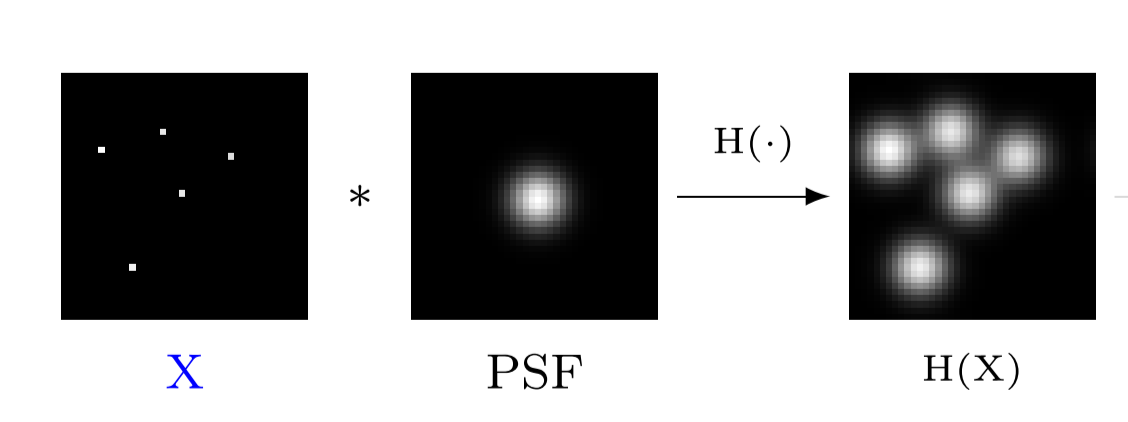

The figure above shows the model of acquisiton. The linear operation is in this case a convolution with the point spread function (PSF), which is modeled as a $h(x,y) =\exp{\frac{-x^2-y^2}{2\sigma^2}}$.

As the question 1 shows, it is not always possible or even smart to create the full matrix $A$. So we will start by creating the function $H(x)=h*x$, where $*$ denotes the convolution. Since a convolution in the Fourier domain is a element wise multiplication, we will  do the operation in the Fourier domaine.  


In this lab we will work with an image of two molecules. Each pixel is of $10 \times 10 nm^2$ and the PSF is supposed to be a Gaussian PSF with $\sigma=150 nm$. The image is $64 \times 64 $. 

The steps to create the convolution kernel is: 
1. Create a meshgrid of same size of the image. This means same size with respect to the number of pixels, but also with respect to the size in nanometers. The center of the meshgrid could be 0. 
2. Apply the the gaussian function onto the grid, and normalize the response such that the sum of all elements in the reponse =1. 
3. Apply the Fast fourier Transformation. NOTE: If the center of the grid was defined as 0, a fftshift has to be done before applying the FFT2. 

In [8]:
mesh = np.linspace(-320, 310, 64)
x, y = np.meshgrid(xx, xx)
gaussian_mesh = np.exp((-x**2 - y**2)/(2*150**2))

In [9]:
gaussian_mesh.shape
#check if size is ok

(64, 64)

In [10]:
gaussian_mesh_norm = z/np.sum(gaussian_mesh)

In [11]:
mesh_fftshift = np.fft.fftshift(gaussian_mesh_norm)
mesh_fft = np.fft.fft2(mesh_fftshift)
mesh_fft_shift_to_view = np.fft.fftshift(mesh_fft)

Plot the convolution kernel before and after the fourier transformation.

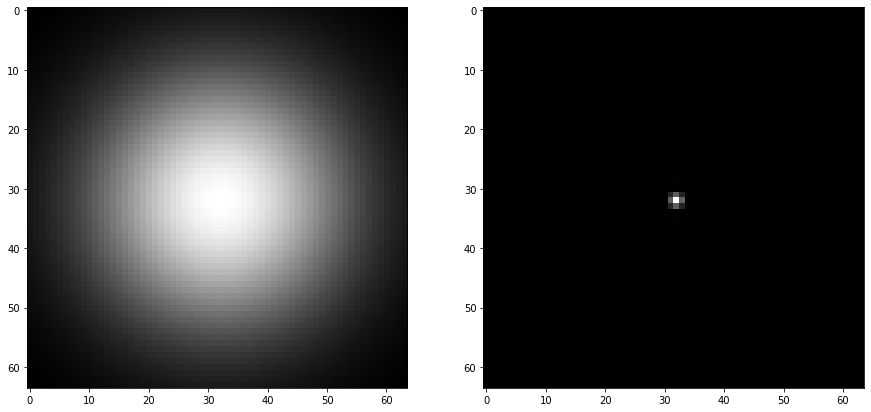

In [12]:
#Plot here
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,2,1)
plt.imshow(gaussian_mesh_norm, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(abs(mesh_fft_shift_to_view), cmap='gray')

#### The importance of Matrix Condition number
The matrix condition number can be calculated, for an $A$ invertible, as 
$$
cond(A) = \|A\|\|A^{-1}\|
$$
Where $\|A\|=\sup_{x \neq 0} \frac{\|Ax\|}{\|x\|}$.
It can also be calculated  $$
cond(A) = \frac{\lambda_{max}}{\lambda_{min}}
$$

If we have 
$
y=Ax
$, then $\|y\|\leq \|A\|\|x\|$.
If we have a small pertubation, then 
$y+\delta y = A(x+ \delta x)$, and $\delta y= A \delta x$. Which yields  $\|\delta x\|\leq \|A^{-1}\|\|\delta y\|$.
And thus, 

$$\frac{\|\delta x\|}{\|x\|}\leq\|A\| \|A^{-1}\|\frac{\|\delta y\|}{y}$$
or, equivalently
$$\frac{\|\delta x\|}{\|x\|}\leq cond(A) \frac{\|\delta y\|}{y}$$

Why is the Matrix Condition number important ? 

What is the cardinal number for our problem?  Is the problem ill-posed? 

In [23]:
np.abs(np.max(np.real(mesh_fft.flatten()))/np.min(np.real(mesh_fft.flatten())))

199.9703843044907

In [21]:
#Should be larger????? I tried and it's still 200

**Answer:** 

1) Matrix condition is important due to approximation, since a small input change can have a huge impact on the output.

2) If the cardinal number is high, the problem is ill-posed and the image will explode when reconstructed. Using FFT we calculate the Eigen value which gives the result about 200. Hence we conclude that it is indeed an ill-posed problem.    

### Data set

Image t1 is an image of two molecules observed through a microscope. Use  the result from question 3 to calculate $\hat{x}$. Does the results seems correct? Note: To create the function associated with $A^*$, you can use the function np.conj.

In [49]:
test = sio.loadmat('NoiseZero.mat')
t1 = test['imagenonoise']
t1_x_hat = np.fft.ifft2( (np.conj(mesh_fft) * np.fft.fft2(t1) ) / np.abs(mesh_fft)**2)

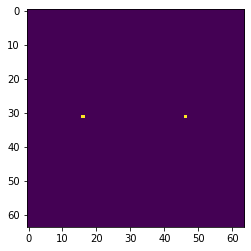

In [50]:
plt.imshow(np.abs(t1_x_hat))

**Answer:** The result seem correct, we see two molecules recovered from the microscope image

Using t2, which is the image t1, which has some  added gaussian noise, calculate $\hat{x}$.  Does the results seem correct?

In [47]:
test2 = sio.loadmat('imageNoise.mat')
t2 = test2['imageNoise']
t2_x_hat = np.fft.ifft2( (np.conj(mesh_fft) * np.fft.fft2(t2) ) / np.abs(mesh_fft)**2)

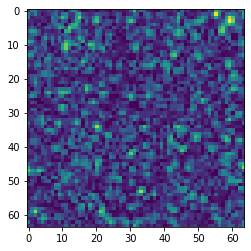

In [48]:
plt.imshow(np.abs(t2_x_hat))

**Answer:** The result seem incorrect, we see no molecules recovered from the microscope image. The noise is too strong.

Another way to find  the minimum, we impliment the gradient descent algorithm. The algorithm can be written as:
\begin{equation}
 x_{k+1} = x_k - \alpha 2 A^*(A x_k - y)
\end{equation}
avec $k = 0 \dots K-1$, $x_0 = A^*y$ et $0 < \alpha \leq \frac{1}{2}$.

Complete the gradient descent function below and plot the cost function and the resulting image. NOTE: If the cost function is not descending the whole time, you have done an error.

In [51]:
# Initialisation
hconj=np.conj(mesh_fft)
xk= np.real(np.fft.ifft2(hconj*np.fft.fft2(t2)))
K= 30000
J = np.zeros(shape=( K));    # Fonction de cout
err = np.zeros(shape=(K));  # Erreur par rapport a la solution exacte
# Boucle principale
k=0;
alpha=0.4
while k <K :
    # Calcul du gradient
    
    gradJ = 2* np.real(np.fft.ifft2(hconj * (mesh_fft*np.fft.fft2(xk) - np.fft.fft2(t2))))
    # Mise a jour de xk
    xk = xk-alpha*gradJ;
    
    # Calcul de l'erreur et la fonction de cout
    J[k] = np.linalg.norm(np.real(np.fft.ifft2(mesh_fft*np.fft.fft2(xk))) - t2, 'fro')**2  # cost function
    
    k=k+1



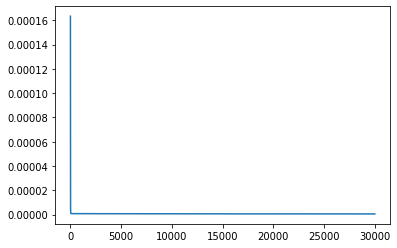

In [52]:
plt.plot(J)

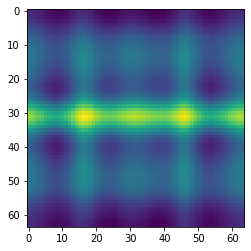

In [53]:
plt.imshow(xk)

Why do you think the result is not very good? 

**Answer:** The molecules are detected but the image is very blurry and we can observe that the luminescence propagates on pixels around and have some horizontal and vertical patterns. As the cost function suggests, only initially the improevements are noticeable.

### Regularisation

As we can observe from the above example, the minimization does not yield good results when we have noisy data. Since the problem is ill posed we must add an regularisation term to the minization. The choise of regularization depends on the image model. Since we know that each image contains only a few entries that are not 0, we can add an regulariser that promotes sparsity in an image. An reguliser often used in that case is the $\ell_0$ norm, defined as 
$$
\|x\|_0= \sum_i x_i \neq 0
$$
We also know that the sensor capture the intensity of the molecules, thus the reconstructed image should not contain any negative values. 

Our problem is then to minimize the functional $J$: 

$$
J(x) = \|Ax-y\|^2_2 + \lambda \|x\|_0 + \iota_{\cdot \geq 0}(x)
$$
Where $\lambda$ serves as a regularisation parameter. The greater $\lambda$ is, the sparser the solution will be. 

We will use the proximal gradient descent algorithm (or a Forward Backwards splitting alogrithm) in order to minimize $J$. The algorithm is designed to minimize functionals on the form $G(x)+T(x)$, where $G(x)$ is differential and $T(x)$ is a function on which we can calculate the proximal operator (See http://www.optimization-online.org/DB_FILE/2010/12/2864.pdf if questions). 

The steps are 
1. Calculate the gradient. 
2. Apply the proximal of $T$ on $x_k-\alpha \nabla G$

In this lab you will only observe the effect of the regularisation. Insert the gradient and cost function from the above code in the code below and launch it. 
Note that $K$ is larger here in order to let the code properly converge, the calculation may take some time.  $\lambda =6.55*10^{-7}$. 


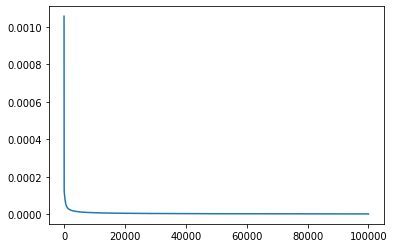

In [67]:
def regularized(lam=6.55*10**(-7)):
    # Initialisation
    xk= np.real(np.fft.ifft2(hconj*np.fft.fft2(t2)))

    K= 5*20000
    J = np.zeros(shape=( K));    # Fonction de cout
    err = np.zeros(shape=(K));  # Erreur par rapport a la solution exacte
    k=0;
#     lam=6.55*10**(-7)
    alpha = 0.4
    # Boucle principale
    while k <K :


        gradJ = 2 * np.real(np.fft.ifft2(hconj * (mesh_fft*np.fft.fft2(xk) - np.fft.fft2(t2))))
        #Proximal of l_0 and positivity constraint.

        xktemp = (xk - alpha*gradJ)
        xk= np.zeros(t2.shape)
        xk[xktemp>np.sqrt(2*lam*alpha)] = xktemp[xktemp>np.sqrt(2*lam*alpha)]

        #la fonction de cout
        J[k] = np.linalg.norm(np.real(np.fft.ifft2(mesh_fft*np.fft.fft2(xk))) - t2,'fro')**2  # fonction cout
         # fonction cout


        k=k+1
    plt.plot(J)
    return xk
    
xk = regularized()

Plot the cost function and image. Does it seems correct?

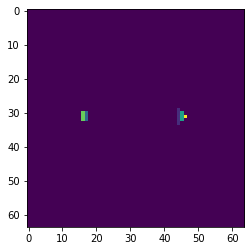

In [68]:
plt.imshow(xk)

Play with the regularisation parameter $\lambda$. What do you observe?

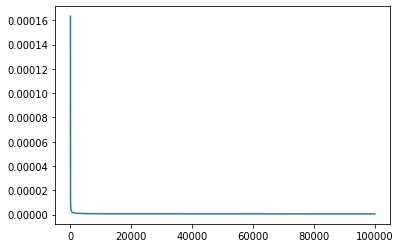

In [69]:
xk8 = regularized(lam=6.55*10**(-8))

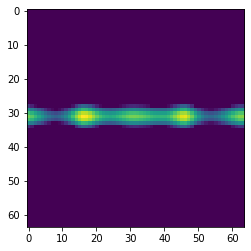

In [70]:
plt.imshow(xk8)

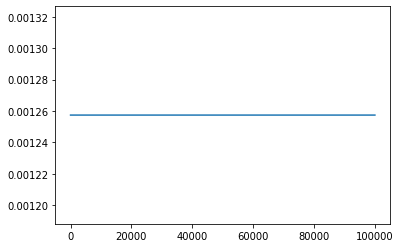

In [71]:
xk6 = regularized(lam=6.55*10**(-6))

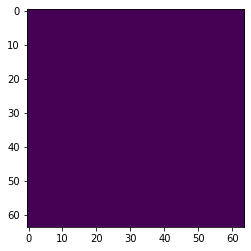

In [72]:
plt.imshow(xk6)

**Answer:** Initial lambda provides pretty good results with both molecules detected well with some distortions, also the cost function is having a more visible bent. Manipulating lambda shows that if lambda is too big, no detection is being made, while if it is set on a very low value, we can observe a very siliar effect to the situation without regularisation, which makes perfect sense as the lambda influence is then negligible.